<a href="https://colab.research.google.com/github/viveknaidu007/repo-32-deep-learning-car-brand/blob/main/Transfer_Learning_Resnet_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving Datasets.zip to Datasets.zip


{'Datasets.zip': b'PK\x03\x04\x14\x00\x00\x00\x00\x00l\x80\xe1P\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0e\x00\x00\x00Datasets/Test/PK\x03\x04\x14\x00\x00\x00\x00\x00\xf4\x80\xe1P\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x13\x00\x00\x00Datasets/Test/audi/PK\x03\x04\x14\x00\x00\x00\x08\x00\xab\x80\xe1P\xd2\xed\xcc-"1\x00\x0081\x00\x00\x19\x00\x00\x00Datasets/Test/audi/21.jpgMWeT\xd5\xc1\xb7\xfd\xd1\xdd!\\\xba\xbb\xbb\xbb\x1b.\x17\xb8\x84t#\xdd\xdd!\xa0tw\xa7t\xa3\xc4\xa5C\xb8\x84\xd2\r\x82\x94\x94\x82"\xcf\xff[\xeb\xc5\x9e\xf9p\xd6\x9c3g\x9f3\xf3af\xbf|}\xd9\x05\xf0\xd5\x95\xd5\x94\x01\x04\x04\x00@\xf87\x80\x97\r \x06\xc0@E#""$!"""!%yEN\xf6\x1f\xbc\x02\x91Q\x80@\xaf^\xfd\xb3\xc8\xc8((h\xd8\xe9\xc8@L\x14\xaf\xc8\xe8\xf8\xe8\x99\xd89\xb8\xb9y\xc8h\x04D\x05\xb8DX\xb9\xb89\x10011qqpA\xf8\xf8 .f\x1a&\xae\xff\x80\x9b\x8bK\x88\xeb\x7f\xc1\xfb\xdf\xf3\xbfW\xff\x0f\x1c\xffk\xbc\x0c\x01\x04\xe8@9\x820\x12\x02=\x80H\x80\x80D\x80\xf0\x02\x03(\x01\x00\x11\x11\xe9?\xa5\xfe\x0f\x90Q\x9

In [4]:
%pwd

'/content'

In [5]:
%cd /content

/content


In [6]:
!unzip Datasets.zip

Archive:  Datasets.zip
   creating: Datasets/Test/
   creating: Datasets/Test/audi/
  inflating: Datasets/Test/audi/21.jpg  
  inflating: Datasets/Test/audi/22.jpg  
  inflating: Datasets/Test/audi/23.jpg  
  inflating: Datasets/Test/audi/24.jpg  
  inflating: Datasets/Test/audi/25.jpg  
  inflating: Datasets/Test/audi/26.jpg  
  inflating: Datasets/Test/audi/27.jpg  
 extracting: Datasets/Test/audi/28.jpg  
  inflating: Datasets/Test/audi/29.jpg  
   creating: Datasets/Test/lamborghini/
  inflating: Datasets/Test/lamborghini/1.jpg  
  inflating: Datasets/Test/lamborghini/10.jpg  
  inflating: Datasets/Test/lamborghini/11.jpg  
  inflating: Datasets/Test/lamborghini/12.jpg  
  inflating: Datasets/Test/lamborghini/13.jpg  
  inflating: Datasets/Test/lamborghini/14.jpg  
  inflating: Datasets/Test/lamborghini/15.jpg  
  inflating: Datasets/Test/lamborghini/16.jpg  
  inflating: Datasets/Test/lamborghini/17.jpg  
  inflating: Datasets/Test/lamborghini/18.jpg  
  inflating: Datasets/Test/l

In [7]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/Datasets/Train'
valid_path = '/content/Datasets/Test'


In [8]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94765736/94765736 [==============================] - 1s 0us/step


In [9]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [10]:
  # useful for getting number of output classes
folders = glob('/content/Datasets/Train/*')

In [11]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [13]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [17]:
test_set = test_datagen.flow_from_directory('/content/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [18]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-18-69229fe26ea3>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 12s 4s/step - loss: 5.1293 - accuracy: 0.5000 - val_loss: 2.7259 - val_accuracy: 0.2586
Epoch 2/50
2/2 [==============================] - 1s 612ms/step - loss: 3.6121 - accuracy: 0.4375 - val_loss: 5.4583 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 1s 633ms/step - loss: 4.1601 - accuracy: 0.4688 - val_loss: 1.1410 - val_accuracy: 0.5517
Epoch 4/50
2/2 [==============================] - 1s 621ms/step - loss: 3.1087 - accuracy: 0.3750 - val_loss: 5.4978 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 1s 627ms/step - loss: 2.9041 - accuracy: 0.4844 - val_loss: 3.2675 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 1s 611ms/step - loss: 2.3630 - accuracy: 0.5625 - val_loss: 3.2427 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 1s 610ms/step - loss: 2.9844 - accuracy: 0.4375 - val_loss: 1.5534 - val_accuracy: 0.5345
Epoch 8/50
2/2 [======

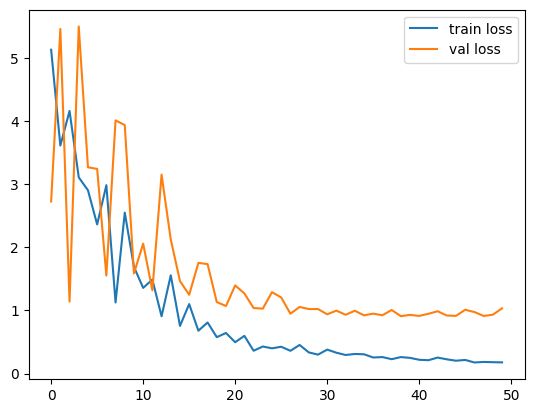

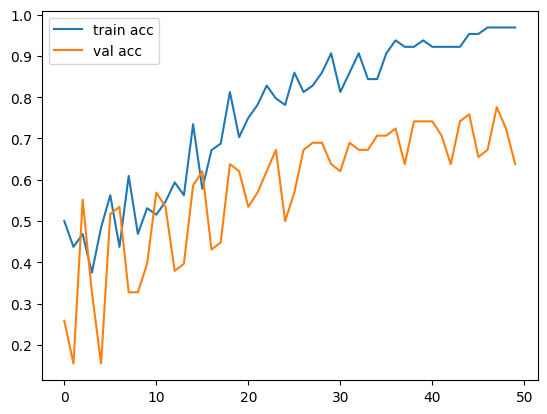

<Figure size 640x480 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [22]:
%pwd

'/content'

In [23]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:

y_pred = model.predict(test_set)


2/2 [==============================] - 1s 129ms/step


In [25]:
y_pred

array([[6.06579423e-01, 2.64316350e-01, 1.29104272e-01],
       [1.77723002e-02, 7.15698898e-01, 2.66528726e-01],
       [1.72026623e-02, 5.18315971e-01, 4.64481413e-01],
       [3.74573581e-02, 6.90702736e-01, 2.71839947e-01],
       [2.38561988e-01, 3.79278511e-02, 7.23510146e-01],
       [3.43758501e-02, 7.71771837e-03, 9.57906425e-01],
       [3.47854337e-03, 3.37705404e-01, 6.58815980e-01],
       [2.52046257e-01, 1.92532122e-01, 5.55421591e-01],
       [3.97786386e-02, 4.61376682e-02, 9.14083660e-01],
       [5.91394026e-03, 8.94283934e-04, 9.93191779e-01],
       [8.35610460e-03, 4.96685156e-04, 9.91147220e-01],
       [3.05633694e-02, 2.95248777e-01, 6.74187839e-01],
       [2.64556743e-02, 6.00039899e-01, 3.73504370e-01],
       [5.34587307e-03, 9.91757810e-01, 2.89630424e-03],
       [1.34891365e-02, 3.44614565e-01, 6.41896307e-01],
       [2.57504489e-02, 2.35271439e-01, 7.38978148e-01],
       [4.24743354e-01, 1.52080178e-01, 4.23176408e-01],
       [1.42839235e-06, 6.48800

In [26]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [27]:
y_pred

array([0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2,
       1, 1, 2, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 1, 1,
       2, 2, 1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 2, 2])

In [28]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [29]:
model=load_model('model_resnet50.h5')

In [44]:
img=image.load_img('/content/Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [45]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [194., 188., 174.],
        [215., 209., 197.],
        [241., 235., 223.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [247., 245., 233.],
        [245., 242., 233.],
        [244., 241., 232.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 248., 241.],
        [244., 250., 248.],
        [244., 250., 248.]],

       ...,

       [[190., 206., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[187., 205., 227.],
        [187., 205., 227.],
        [187., 205., 227.],
        ...,
        [172., 179., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [187., 2

In [46]:
x.shape

(224, 224, 3)

In [47]:
x=x/255

In [48]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [49]:
model.predict(img_data)

1/1 [==============================] - 0s 23ms/step


array([[1.7276632e-02, 5.8897969e-04, 9.8213434e-01]], dtype=float32)

In [50]:
img_data

array([[[[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-103.25665 , -116.04175 , -122.91921 ],
         [-103.16645 , -115.95939 , -122.83686 ],
         [-103.06449 , -115.85743 , -122.7349  ]],

        [[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-103.025276, -115.818214, -122.71137 ],
         [-103.025276, -115.82998 , -122.719215],
         [-103.0292  , -115.8339  , -122.72314 ]],

        [[-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         [-102.95077 , -115.790764, -122.691765],
         ...,
         [-102.993904, -115.80645 , -122.719215],
         [-102.96645 , -115.79861 , -122.72314 ],
         [-102.96645 , -115.79861 , -122.72314 ]],

        ...,

        [[-103.04096 , -115.97115 , -1

In [51]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 31ms/step


In [52]:
a

array([2])

In [55]:
a==1

array([False])